<a href="https://colab.research.google.com/github/dkd99/my-code-practice/blob/main/Freecharge_Deepak_Dubey_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective:** The main objective for building the machine learning model is to categorize transactional data which will be displayed to the customer on personal finance manager application

Data: Please find it attached

Categories: Please find it attached

**Exercise:**

1. Perform Exploratory data analysis on the data

2. Clean the data & categorize it and perform logical mappings as per the given categories

3. Develop at least 1 ML model (BERT) which can categorize the data, prepare pros & cons of both the models and which is the best suited model & why. Model should be highly accurate & scalable.

4. Demonstrate both the models by passing an array of transactions & the output should be the mapped categorization clearly displaying the accuracy.**


Imprting important libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Let's Explore our data:**

Read an Excel file into a pandas DataFrame.

In [3]:
#loading excel file as dataframe
df=pd.read_excel('/content/drive/MyDrive/csv files/Final_train_prep (1).xlsx')

#**Now, Let's start Exploring the dataframe:**

Head of DataFrame:

In [4]:
#head
df.head()

,Sl. No.,Date,Cheque No.,Description,Sub-Category,Category,Amount,Category.1,Balance
0,12.0,44455,NaN,TO TRANSFER-UPI/DR/125990176674/HOTEL AK/UTIB/...,Accomodations,Travel,-786.0,Transfer to GPAY-11182,22340.36
1,46.0,44477,NaN,TO TRANSFER-UPI/DR/128188085567/HOTEL AK/UTIB/...,Accomodations,Travel,-1321.0,Transfer to GPAY-11182,12066.36
2,12.0,44455,NaN,TO TRANSFER-UPI/DR/125990176674/HOTEL AK/UTIB/...,Accomodations,Travel,-786.0,Transfer to GPAY-11182,22340.36
3,570.0,44233,NaN,UPI/P2M/103840249705/Hotel Gra/Yes Bank /NA,Accomodations,Travel,-1100.0,Transfer to Hotel Gra,54.48
4,503.0,44219,NaN,UPI/P2M/102321272114/Hotel Shw/Axis Bank/UPI,Accomodations,Travel,-440.0,Transfer to Hotel Shw,2519.28


Tail of DataFrame:

In [5]:
#tail
df.tail()

,Sl. No.,Date,Cheque No.,Description,Sub-Category,Category,Amount,Category.1,Balance
54251,105.0,2022-02-05 00:00:00,NaN,NACH-10-DR-INCRED FINANCIAL SER -INCRED78CVSDJ...,NaN,NaN,-4119.0,Loan,15950.11
54252,106.0,2022-02-05 00:00:00,NaN,UPI/HARI PRADHAN D/203640954009/Payment from P...,NaN,NaN,-15000.0,Transfer to HARI PRADHAN D,950.11
54253,107.0,2022-02-06 00:00:00,NaN,UPI/KOSANA RAJASEKH/203755167677/UPI (Ref# UPI...,NaN,NaN,3000.0,Transfer from KOSANA RAJASEKH,3950.11
54254,108.0,2022-02-07 00:00:00,NaN,UPI/Electricity Boa/203852514873/Oid1724063818...,NaN,NaN,-591.0,Utilities,3359.11
54255,109.0,2022-02-20 00:00:00,NaN,UPI/BOLLAVARAPU KIS/205121977570/Payment from ...,NaN,NaN,-3000.0,Transfer to BOLLAVARAPU KIS,359.11


What's the shape of DataFrame:

In [6]:
#shape of dataframe
df.shape

(54256, 9)

Different columns present in Dataframe:

In [7]:
#columns in dataframe
df.columns

Index(['Sl. No.', 'Date', 'Cheque No.', 'Description', 'Sub-Category',
       'Category', 'Amount', 'Category.1', 'Balance'],
      dtype='object')

Information about Null values and datatypes of Dataframe:

In [8]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54256 entries, 0 to 54255
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sl. No.       54255 non-null  float64
 1   Date          54255 non-null  object 
 2   Cheque No.    292 non-null    float64
 3   Description   54255 non-null  object 
 4   Sub-Category  21362 non-null  object 
 5   Category      21362 non-null  object 
 6   Amount        54255 non-null  float64
 7   Category.1    54255 non-null  object 
 8   Balance       54256 non-null  float64
dtypes: float64(4), object(5)
memory usage: 3.7+ MB


In [9]:
#desciption of variables having object dtype
df.describe(include='object')

,Date,Description,Sub-Category,Category,Category.1
count,54255,54255,21362,21362,54255
unique,795,49818,49,11,10630
top,2021-12-06 00:00:00,Consolidated Charges for A/c,Wallet Payments,Payments,Transfer out
freq,355,154,6461,8177,6284


Decription of features having Numerical datatypes in dataframe:

In [97]:
#description of variables having numerical dtype
df[['Amount','Balance']].describe()

,Amount,Balance
count,5.369700e+04,5.369800e+04
mean,-5.594667e+01,3.275532e+04
std,3.991012e+04,1.043433e+05
min,-3.300000e+06,-1.459901e+05
25%,-1.686000e+03,1.963145e+03
50%,-2.000000e+02,1.009250e+04
75%,-1.000000e+00,3.221336e+04
max,3.960000e+06,4.021982e+06


In [11]:
df.describe().columns.tolist()

['Sl. No.', 'Cheque No.', 'Amount', 'Balance']

How many duplicate values are present in our dataframe:

In [12]:
#checking duplicates
df[df.duplicated()]

,Sl. No.,Date,Cheque No.,Description,Sub-Category,Category,Amount,Category.1,Balance
2,12.0,44455,NaN,TO TRANSFER-UPI/DR/125990176674/HOTEL AK/UTIB/...,Accomodations,Travel,-786.00,Transfer to GPAY-11182,22340.36
9,401.0,44182,NaN,UPI/P2M/035215679723/makemytri/ICICI Ban/UPI,Airlines,Travel,-1160.25,Travel,230.07
11,411.0,44185,NaN,UPI/P2M/035509132932/makemytri/ICICI Ban/UPI,Airlines,Travel,-600.00,Travel,730.07
12,411.0,44185,NaN,UPI/P2M/035509132932/makemytri/ICICI Ban/UPI,Airlines,Travel,-600.00,Travel,730.07
430,412.0,44274,NaN,POS/CAPITAL BOOK DEPO/NOIDA/190321/04:16,Books & Stationery,Shopping,-4474.00,Transfer to CAPITAL BOOK DEPO,280.62
...,...,...,...,...,...,...,...,...,...
47477,157.0,2022-03-02 00:00:00,NaN,NFS/03303377/CASH WDL/02-03-22,NaN,NaN,-10000.00,Cash Withdrawal,39125.29
47478,158.0,2022-03-02 00:00:00,NaN,NFS/03303377/CASH WDL/02-03-22,NaN,NaN,-1500.00,Cash Withdrawal,37625.29
47479,159.0,2022-03-03 00:00:00,NaN,NFS/BECN1859/CASH WDL/03-03-22,NaN,NaN,-2000.00,Cash Withdrawal,35625.29
47480,160.0,2022-03-03 00:00:00,NaN,NFS/03303377/CASH WDL/03-03-22,NaN,NaN,-10000.00,Cash Withdrawal,25625.29


There are 558 duplicate values present in this dataset.

In [13]:
#number of duplicates
df.duplicated().sum()

558

Let's Drop those duplicate values:

In [4]:
#dropping duplicates
df.drop_duplicates(inplace=True)

Number of Rows after dropping the duplicates:

In [15]:
#length of dataframe
len(df)

53698

Checking for Null Values:

In [16]:
# Missing Value Count Function
def show_missing():
    missing = df.columns[df.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(df[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(df[show_missing()].isnull().sum().sort_values(ascending = False)/len(df)*100,2))

Missing Data Count
Cheque No.      53407
Sub-Category    32401
Category        32401
Sl. No.             1
Date                1
Description         1
Amount              1
Category.1          1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Cheque No.      99.46
Sub-Category    60.34
Category        60.34
Sl. No.          0.00
Date             0.00
Description      0.00
Amount           0.00
Category.1       0.00
dtype: float64


Check number has 99.46% missing data and Category and subcategory has around 60% missing data.

Since, Check No. contains 99.46% of missing data and SI no column is irrelevant for our analaysis so, Lets drop them.

In [5]:
df.drop(columns=['Cheque No.','Sl. No.','Date'], inplace=True)
df.shape

(53698, 6)

After row number 21296 all the values in category and subcategories are null.

Since ,Categories and sucategories are all null after  21296 row ,So lets create a new datframe having values till 21297 rows in dataframe.

In [18]:
df[:21297].isnull().sum()

Description     0
Sub-Category    0
Category        0
Amount          0
Category.1      0
Balance         0
dtype: int64

In [19]:
df.iloc[21297:].isnull().sum()

Description         1
Sub-Category    32401
Category        32401
Amount              1
Category.1          1
Balance             0
dtype: int64

#**EDA:**

Let's check the number of unique categories:

In [20]:
#number of unique categories
df['Category'].nunique()

11

Ther are 11 unique categories for which transactions  happened.

Let's check the number of unique Sub-categories:

In [21]:
#number of unique sub-categories
df['Sub-Category'].nunique()

49

There are 49 distinct subcategories .

In [22]:
#value count for different categories
df['Category'].value_counts()

Payments         8177
Credit           5544
Fund Transfer    4862
Others           1147
Shopping          635
Food              366
Investment        258
Entertainment     128
Travel            100
Healthcare         58
Education          22
Name: Category, dtype: int64

We can observe that our data has some data imbalance w.r.t categories.

Most Amount of transactions  happened for payment category followed by credit.

Let's visualize this using graph.

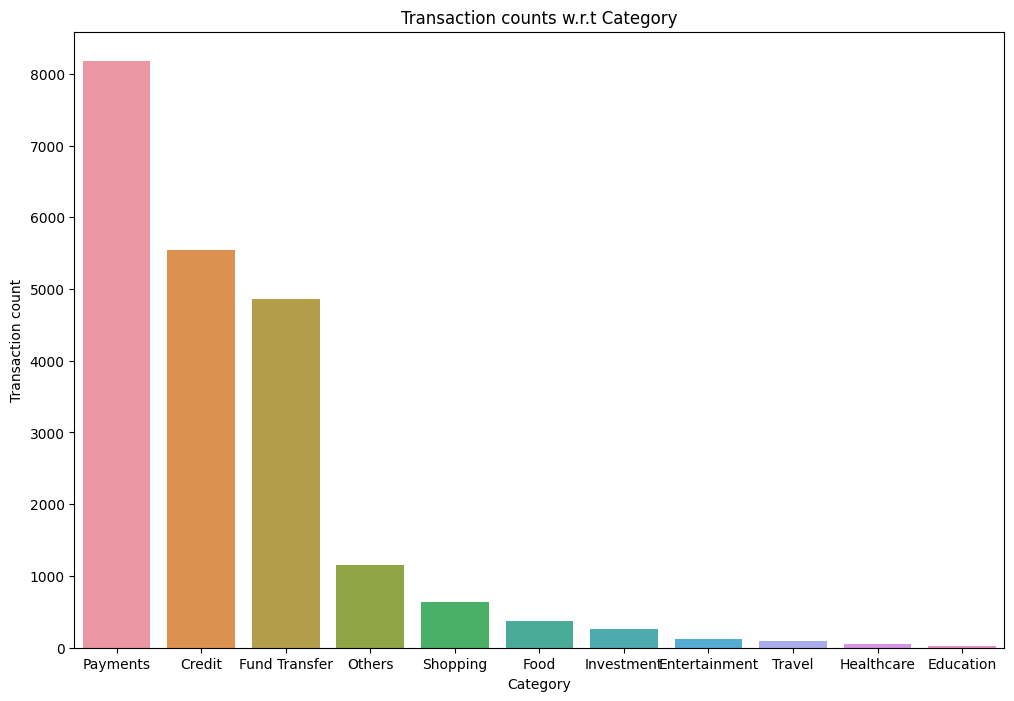

In [23]:
#plotting value counts corresponding to categories using seaborn
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(x='Category',data=df,ax=ax,order=df['Category'].value_counts(ascending=False).index)
plt.ylabel('Transaction count')
plt.title('Transaction counts w.r.t Category')
plt.show()

Category wise value count for credit transactions:

In [24]:
df[df['Amount']>0]['Category'].value_counts()

Credit        5544
Investment      13
Others           2
Payments         2
Name: Category, dtype: int64

([<matplotlib.patches.Wedge at 0x7f1452d7e620>,
 [Text(-0.01056408166038719, -1.0999492716387755, 'Credit'),
  Text(0.014235970249616266, 1.199915554174981, 'Investment'),
  Text(0.005084376860513506, 1.4999913830125626, 'Others'),
  Text(0.0020337454284011193, 1.7999988510772813, 'Payments')],
 [Text(-0.005762226360211194, -0.5999723299847867, '99.7%'),
  Text(0.00830431597894282, 0.6999507399354057, '0.2%'),
  Text(0.0033895845736756705, 0.9999942553417084, '0.0%'),
  Text(0.0014688161427341415, 1.299999170222481, '0.0%')])

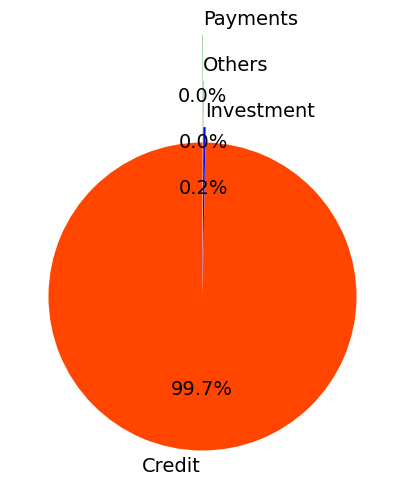

In [68]:
plt.figure(figsize=(5,5))
labels = df[df['Amount']>0]['Category'].value_counts().index.tolist()
sizes = df[df['Amount']>0]['Category'].value_counts().tolist()
explode = (0, 0.1,0.4,0.7)
colors = ['orangered', 'blue','red','green']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle =90, textprops={'fontsize': 14})

Category wise value count for Debit transactions:

In [29]:
df[df['Amount']<0]['Category'].value_counts()

Payments         8175
Fund Transfer    4862
Others           1145
Shopping          635
Food              366
Investment        245
Entertainment     128
Travel            100
Healthcare         58
Education          22
Name: Category, dtype: int64

([<matplotlib.patches.Wedge at 0x7f1452aef400>,
 [Text(-1.0979345444755688, -0.06737756338148246, 'Payments'),
  Text(1.0657497278613794, -0.5515229075599632, 'Fund Transfer'),
  Text(0.975878527702509, 0.8588719923068767, 'Others'),
  Text(0.6397700047303087, 1.1887785079851425, 'Shopping'),
  Text(0.40552901381754286, 1.339979932294574, 'Food'),
  Text(0.25657171320048666, 1.4778940949829145, 'Investment'),
  Text(0.15563506434626792, 1.5924125491674364, 'Entertainment'),
  Text(0.0882026429786113, 1.6977103091433436, 'Travel'),
  Text(0.03665179578793802, 1.799626807386887, 'Healthcare'),
  Text(0.008344817115212386, 1.8999816746556566, 'Education')],
 [Text(-0.5988733878957647, -0.036751398208081335, '52.0%'),
  Text(0.6216873412524713, -0.3217216960766452, '30.9%'),
  Text(0.6005406324323131, 0.5285366106503856, '7.3%'),
  Text(0.40281815112649055, 0.7484901716943488, '4.0%'),
  Text(0.26069722316842037, 0.8614156707607976, '2.3%'),
  Text(0.17104780880032444, 0.9852627299886095, 

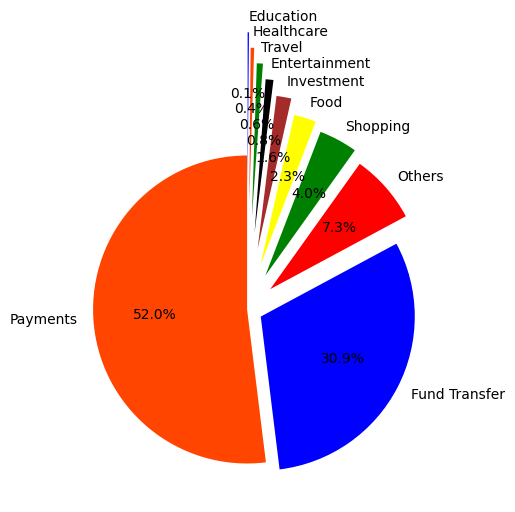

In [93]:
plt.figure(figsize=(5,5))
labels = df[df['Amount']<0]['Category'].value_counts().index.tolist()
sizes = df[df['Amount']<0]['Category'].value_counts().tolist()
explode = (0, 0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8)
colors = ['orangered', 'blue','red','green','yellow','brown','black','green']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle =90, textprops={'fontsize': 10})

Lets count the subcategorywise transactions:

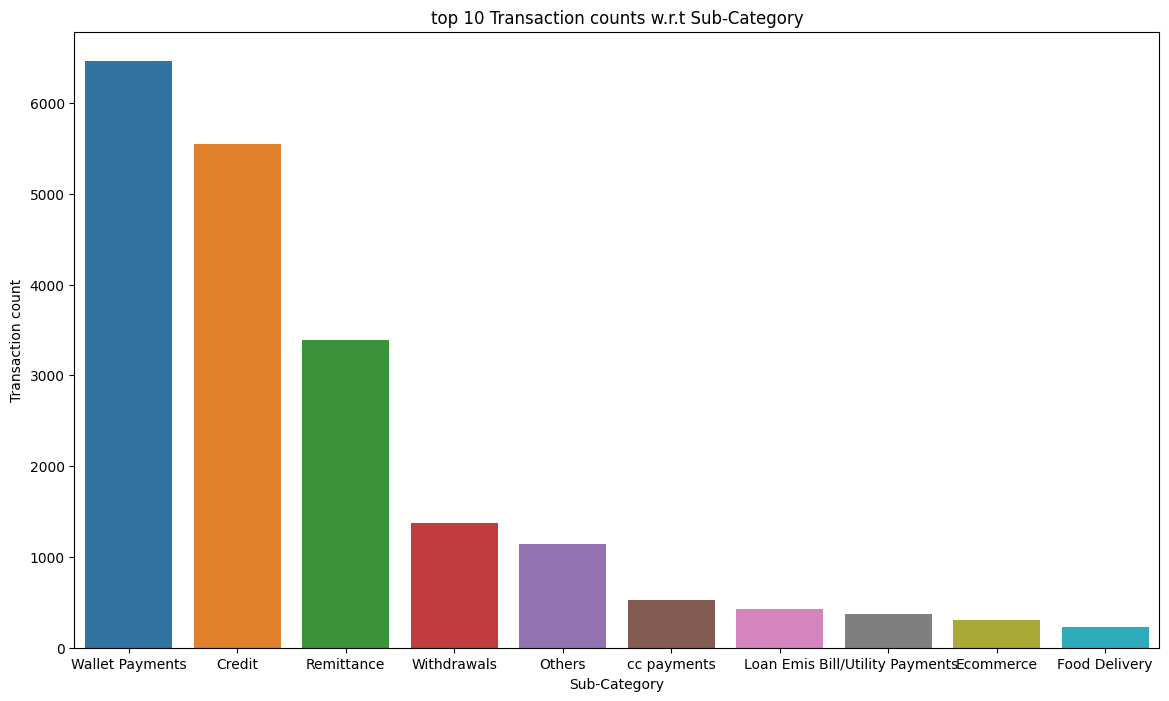

In [ ]:
#plotting value counts corresponding to sub-categories using seaborn

fig, ax = plt.subplots(figsize=(14, 8))
sns.countplot(x='Sub-Category',data=df,ax=ax,order=df['Sub-Category'].value_counts(ascending=False)[:10].index)
plt.ylabel('Transaction count')
plt.title('top 10 Transaction counts w.r.t Sub-Category')
plt.show()

Most amount of transactions for subcategory happend through wallet payments followed by credit and remmitance.

In [92]:
x=0
for i in df['Category'].unique().tolist():
  x=x+1
  print(x)

  print('Sub-Category for following category:',i)
  print('Number of Sub-Categories for following category:',df[df['Category']==i]['Sub-Category'].nunique() )
  print(df[df['Category']==i]['Sub-Category'].value_counts())
  print('')
  print(df[df['Category']==i]['Sub-Category'].unique())

1
Sub-Category for following category: Travel
Number of Sub-Categories for following category: 8
Cab/Bike Services    40
Railways             23
Local Railways       12
Travel-Others         8
Accomodations         6
Travel & Tours        6
Airlines              4
Car Rentals           1
Name: Sub-Category, dtype: int64

['Accomodations' 'Airlines' 'Cab/Bike Services' 'Car Rentals'
 'Local Railways' 'Railways' 'Travel & Tours' 'Travel-Others']
2
Sub-Category for following category: Food
Number of Sub-Categories for following category: 3
Food Delivery    227
Restaurants      121
Alcohol           18
Name: Sub-Category, dtype: int64

['Alcohol' 'Food Delivery' 'Restaurants']
3
Sub-Category for following category: Shopping
Number of Sub-Categories for following category: 11
Ecommerce                        302
Groceries & Other Consumables    155
Shopping-Others                  126
Apparel                           20
Electronics                       10
Jewellery & Other Accessories    

In [6]:
df['Amount'].sum()

-3004168.340000007

In [ ]:
#Description of amount for  credit transactions

df[df['Amount']>0]['Amount'].describe()

count    1.319500e+04
mean     1.393661e+04
std      6.233025e+04
min      1.000000e-02
25%      2.800000e+02
50%      2.000000e+03
75%      1.051550e+04
max      3.960000e+06
Name: Amount, dtype: float64

In [ ]:
#Description of amount for  debit transactions
df[df['Amount']<0]['Amount'].describe()

count    4.050200e+04
mean    -4.614532e+03
std      2.759610e+04
min     -3.300000e+06
25%     -3.000000e+03
50%     -5.000000e+02
75%     -1.200000e+02
max     -1.000000e-02
Name: Amount, dtype: float64

Creating a new Dataframe by ignoring the observations having null Category and subcategory values-

In [40]:
#new dataframe
df_new=df[:21297]

In [41]:
len(df_new[df_new['Amount']==0])

0

In [42]:
df_new.isnull().sum()

Description     0
Sub-Category    0
Category        0
Amount          0
Category.1      0
Balance         0
dtype: int64

Lets create a new column which will contain whether the transactions were of credit type or debit type:

In [43]:
df_new['Transaction type']=np.where(df_new['Amount']<0,'Debit','Credit')

Distribution of Trasactions w.r.t debit and credit:

In [44]:
df_new['Transaction type'].value_counts()

Debit     15736
Credit     5561
Name: Transaction type, dtype: int64

([<matplotlib.patches.Wedge at 0x7f4afb26bfa0>,
 [Text(-0.8045019237704127, -0.7501844137608467, 'Debit'),
  Text(0.8410701196027605, 0.7842837840421021, 'Credit')],
 [Text(-0.4388192311474978, -0.40919149841500724, '73.9%'),
  Text(0.475387458905908, 0.4432908344585794, '26.1%')])

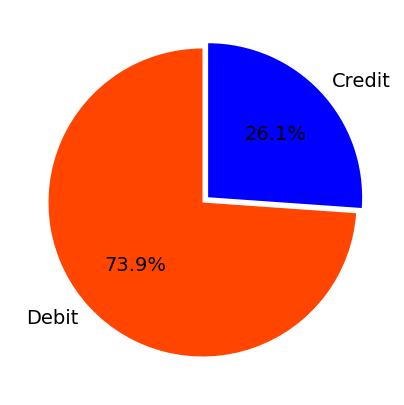

In [ ]:
plt.figure(figsize=(5,5))
labels = df_new['Transaction type'].value_counts().index.tolist()
sizes = df_new['Transaction type'].value_counts().tolist()
explode = (0, 0.05)
colors = ['orangered', 'blue']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle =90, textprops={'fontsize': 14})

We can see from the above pie chart that majority of the transactions are of debit type(73.9%) while 26.1% is of credit type:

Top 10 credit transactions in this new dataframe:

In [ ]:
df_new[df_new['Amount']>0].sort_values(by='Amount',ascending=False)[:10]

,Description,Sub-Category,Category,Amount,Category.1,Balance,Transaction type
1363,00080340007445FROM INSIGHT DTD 06/10/20 (Ref# 10064325061),Credit,Credit,3960000.0,Transfer from A/c 00080340007445,3966598.16,Credit
5420,TFR:ANUJA ANIL PAWASKAR,Credit,Credit,1180000.0,Transfer from ANUJA ANIL,1280175.35,Credit
5207,122212907-PERSONAL LOAN NET DISBURSEMENT (IFSC PL8101205426),Credit,Credit,1040057.0,Personal Loan Disbursed,1049348.39,Credit
2119,"CHQ DEP - MICR - 12 - RICHMOND RD, BENGA : THE JANATHA CO OPERATIVE BANK LIMITED :APEX CO OP BANK LTD AXB",Credit,Credit,1000000.0,Transfer in,1005816.70,Credit
1365,00080340007445FROM INSIGHT DTD 11/11/20 (Ref# 11114116381),Credit,Credit,1000000.0,Transfer from A/c 00080340007445,1002833.47,Credit
2122,"CHQ DEP - MICR - 12 - RICHMOND RD, BENGA : THE JANATHA CO OPERATIVE BANK LIMITED :APEX CO OP BANK LTD AXB",Credit,Credit,767000.0,Transfer in,769945.09,Credit
5001,BY TRANSFER-- (Ref# TRANSFER FROM 40248295754),Credit,Credit,650000.0,Transfer in,652233.02,Credit
1932,NEFT CR-UTIB0001097-RAMESH B M-RAMESHA B M-AXMB203368294272 (Ref# AXMB203368294272),Credit,Credit,540000.0,Transfer from self,540616.70,Credit
2118,CHEQUE DEPOSIT - MICR 8 CLEARING - RICHM : MYLARAIAH B S :STATE BANK OF INDIA,Credit,Credit,500000.0,Transfer in,555325.54,Credit
4984,BY TRANSFER TRANSFER FROM 40469874309,Credit,Credit,500000.0,Transfer in,516721.87,Credit


In [ ]:
df_new.groupby('Category').mean()

,Amount,Balance
Category,,
Credit,13392.066169,34940.072691
Education,-29308.754545,110919.711818
Entertainment,-264.215234,10766.916172
Food,-303.114809,8571.195000
Fund Transfer,-4598.383346,32497.138435
Healthcare,-2272.830000,20942.745345
Investment,-48172.334264,87759.268178
Others,-3232.976739,32454.375423
Payments,-4261.499587,26234.042494


In [ ]:
df_debit=df_new[df_new['Amount']<0]

In [ ]:
df_debit['Amount']=df_debit['Amount'].apply(lambda x: x if x>0 else -x)


Lets see the total amount of debit transaction made w.r.t categories:

In [ ]:
#ascending order of categories w.r.t to debit transactions
x=df_new[df_new['Amount']<0].groupby('Category')['Amount'].sum().sort_values(ascending=True).index.tolist()

In [ ]:
x

['Payments',
 'Fund Transfer',
 'Investment',
 'Others',
 'Education',
 'Shopping',
 'Healthcare',
 'Food',
 'Travel',
 'Entertainment']

Category
Payments        -34857960.12
Fund Transfer   -22357339.83
Investment      -12889322.74
Others           -3872872.32
Education         -644792.60
Shopping          -637889.94
Healthcare        -131824.14
Food              -110940.02
Travel             -82795.16
Entertainment      -33819.55
Name: Amount, dtype: float64


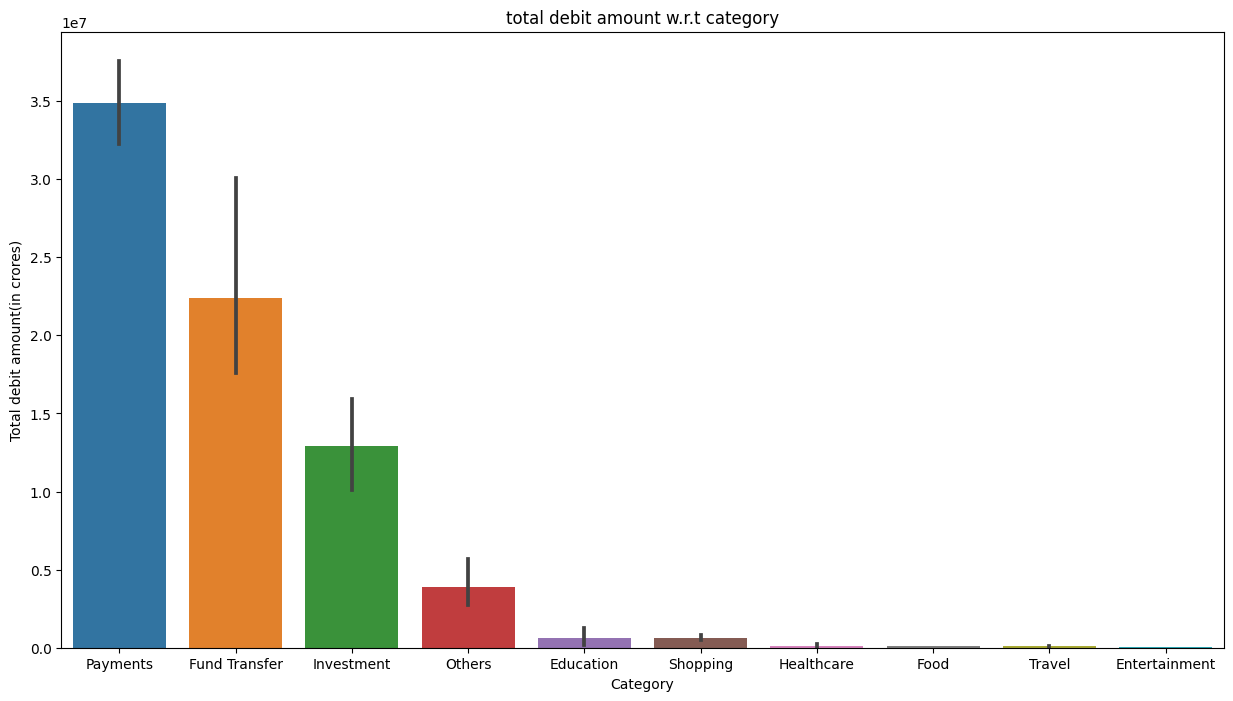

In [ ]:
#plotting different categories w.r.t total debit amount in ascending order
print(df_new[df_new['Amount']<0].groupby('Category')['Amount'].sum().sort_values(ascending=True))
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(y='Amount',x='Category',data=df_debit,ax=ax,order=x,estimator=sum)
plt.ylabel('Total debit amount(in crores)')
plt.title('total debit amount w.r.t category')
plt.show()


In [ ]:
df_credit=df_new[df_new['Amount']>0]

In [ ]:
y=df_new[df_new['Transaction type']=='Credit'].groupby('Category')['Amount'].sum().index.tolist()

In [ ]:
y

['Credit', 'Investment', 'Others', 'Payments']

Category
Credit        74245614.84
Investment      460860.50
Others          164648.00
Payments         11678.00
Name: Amount, dtype: float64


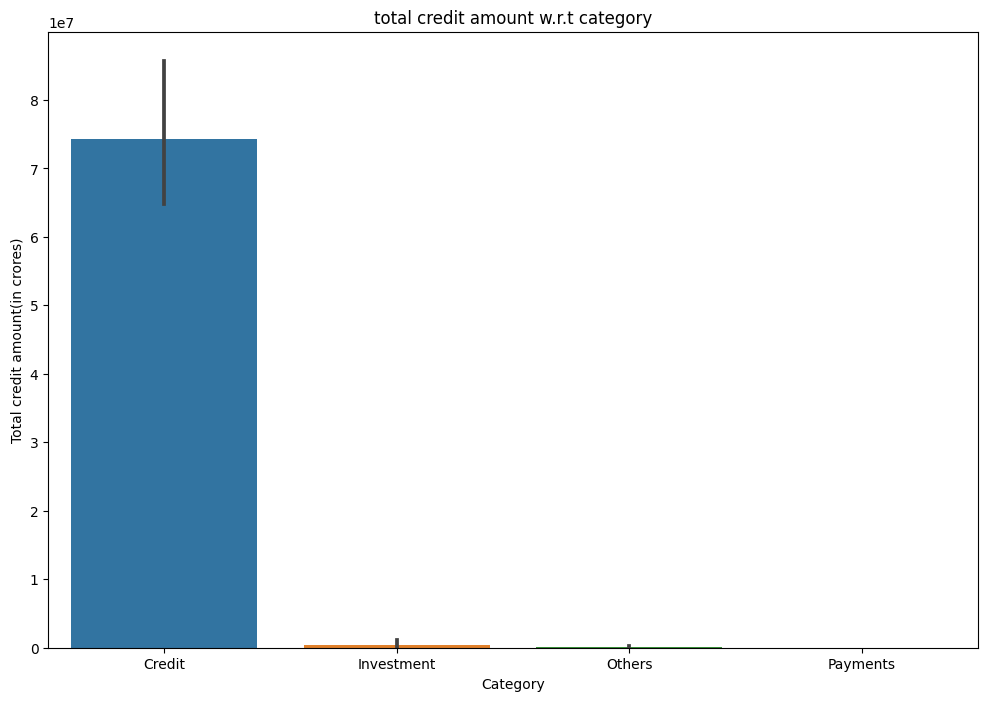

In [ ]:
print(df_new[df_new['Transaction type']=='Credit'].groupby('Category')['Amount'].sum())
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(y='Amount',x='Category',data=df_credit,ax=ax,order=y,estimator=sum)
plt.ylabel('Total credit amount(in crores)')
plt.title('total credit amount w.r.t category')
plt.show()

#**Feature Engineering**

In [45]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Removing speacial characters and numerics from description:

In [46]:
import string
def remove_stopwords_and_special_chars(text):
    stopwords_list=stopwords.words('english')
    # Define a function to remove special characters
    text=re.sub(r"[^a-zA-Z]"," ",str(text).strip())
    # Tokenize the text and remove stopwords and special characters
    text = ' '.join([word for word in word_tokenize(str(text).lower())
                                                       if word not in stopwords_list])

    return text





In [47]:
df_new['clean']=df_new['Description'].apply(remove_stopwords_and_special_chars)

In [48]:
df_new['clean'][:10]

0     transfer upi dr hotel ak utib gpay j ref transfer
1     transfer upi dr hotel ak utib gpay payme ref t...
3                           upi p hotel gra yes bank na
4                         upi p hotel shw axis bank upi
5                     upi p oyo rooms hdfc bank oyoroom
6                         upi p hotel par paytm pay upi
7                         upi p makemytri icici ban upi
8                         upi p makemytri icici ban upi
10                        upi p makemytri icici ban upi
13                     upi p makemytri icici ban paying
Name: clean, dtype: object

**Looking at Top N words in cleaned text:**

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)

    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

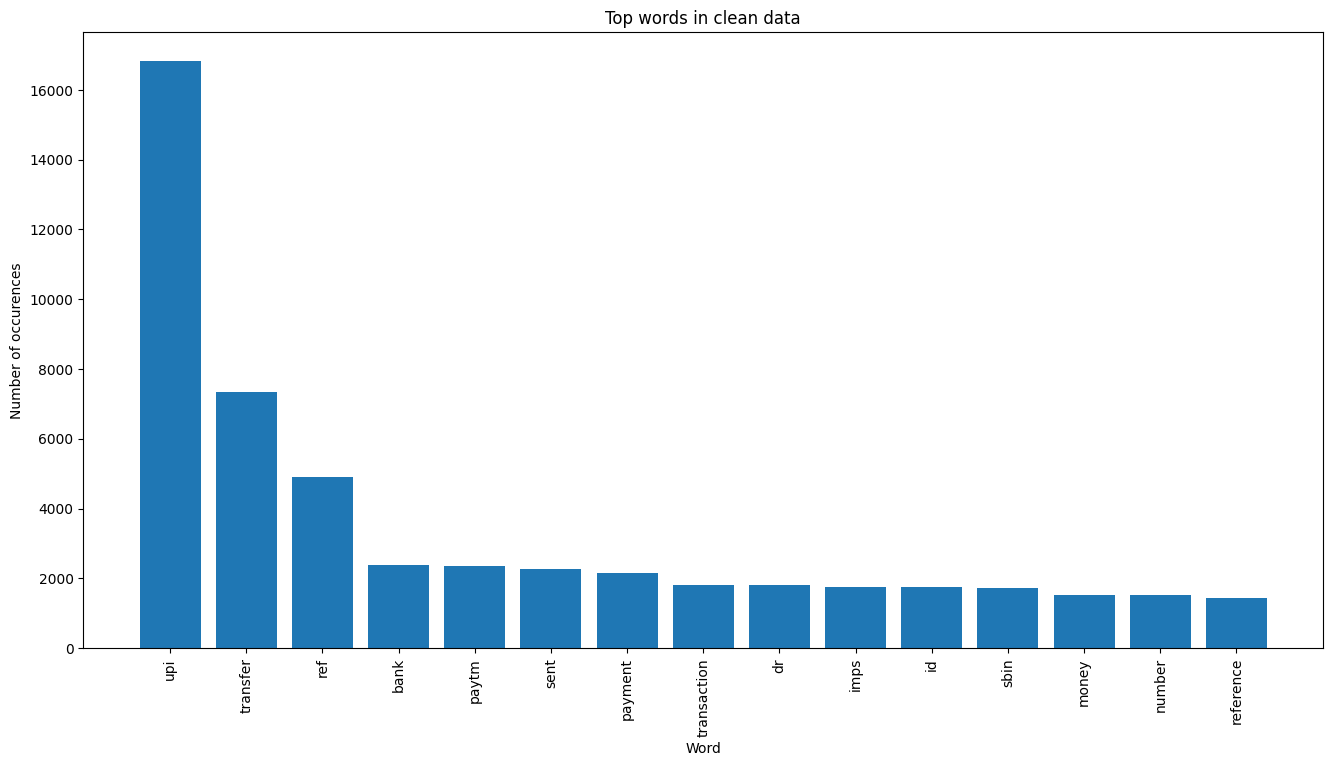

In [94]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer,
                                     text_data=df_new['clean'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in clean data')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

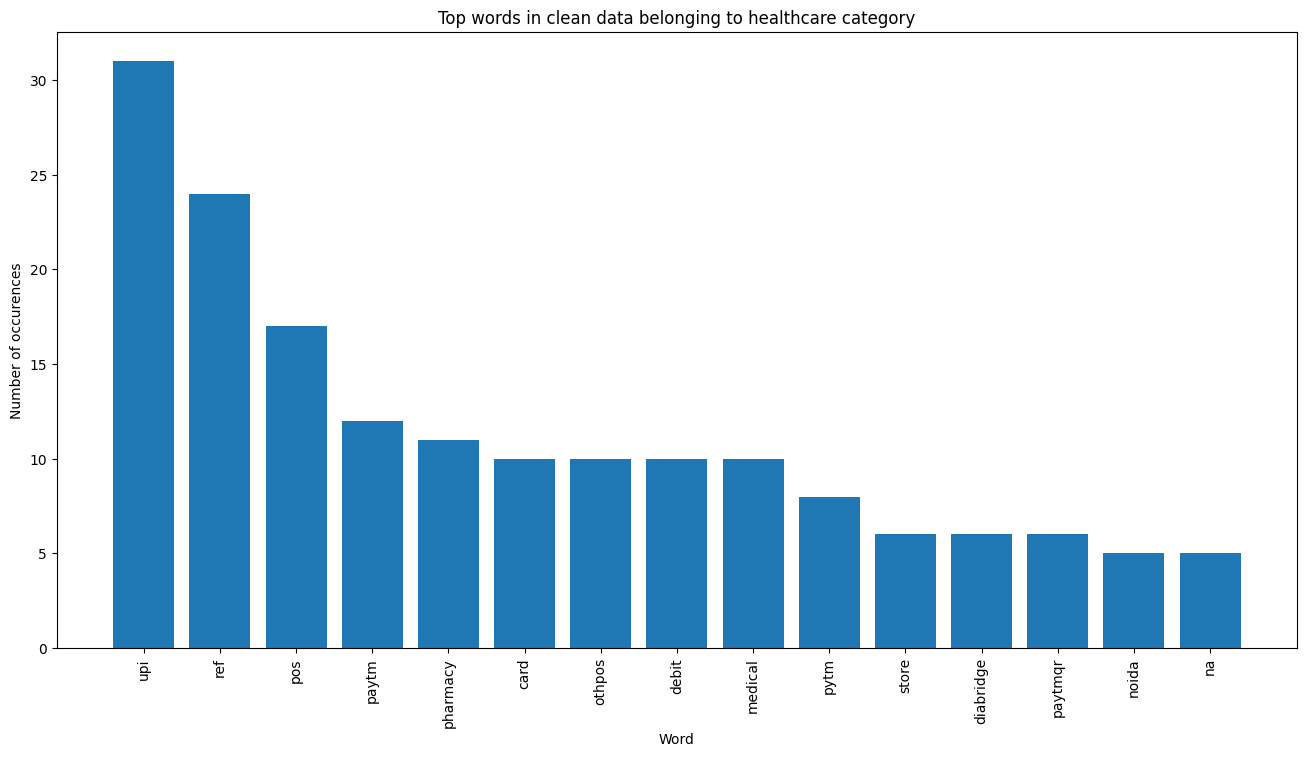

In [95]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer,
                                     text_data=df_new[df_new['Category']=='Healthcare']['clean'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in clean data belonging to healthcare category')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

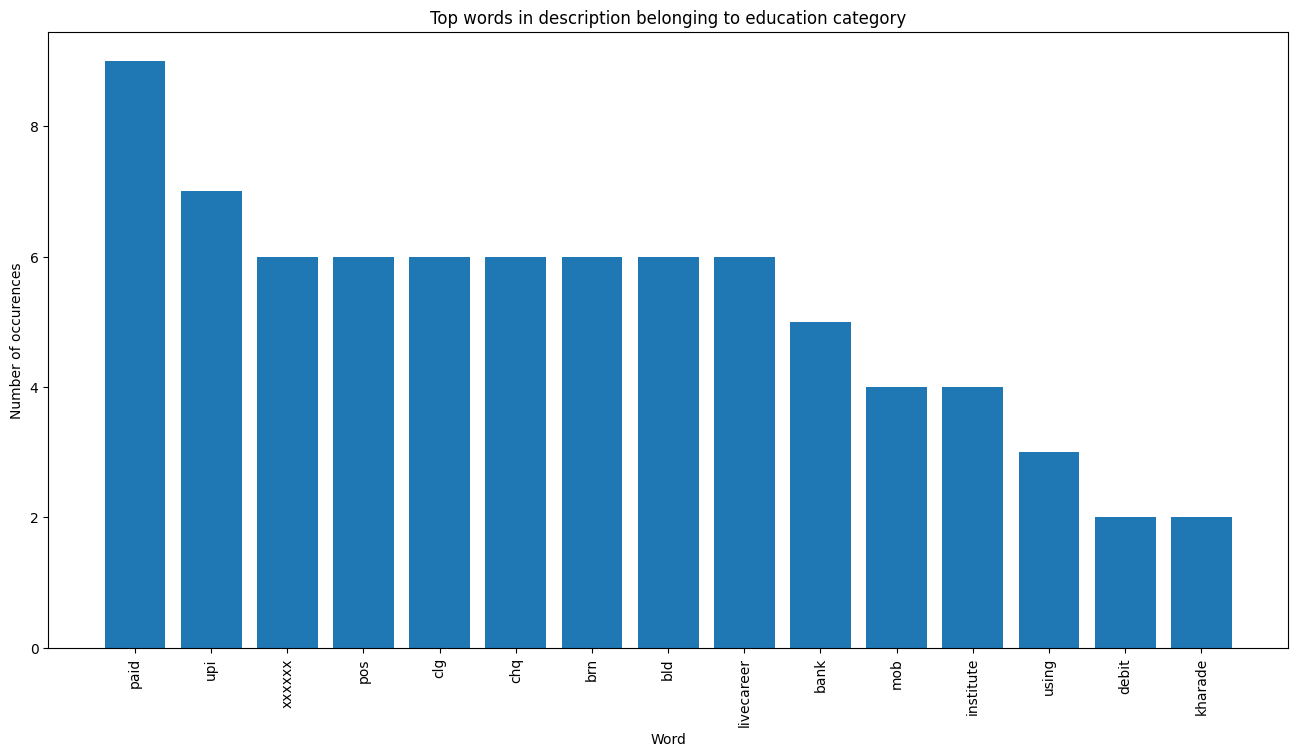

In [96]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer,
                                     text_data=df_new[df_new['Category']=='Education']['clean'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in description belonging to education category')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

#Encoding the dependent feature category with numerics

In [49]:
# Encoding the categories to labels as anything that can be converted to numerics can be fed to ML
categorical_encoding={'Payments':0, 'Credit':1,'Fund Transfer':2 ,'Others':3, 'Shopping':4,'Food':5,  'Investment':6,'Entertainment':7,
       'Travel':8,'Healthcare':9,'Education':10}

In [50]:
df_new['Labels']=df_new['Category'].map(categorical_encoding)

In [51]:
df_new['Labels'].value_counts()

0     8177
1     5544
2     4862
3     1147
4      635
5      366
6      258
7      128
8      100
9       58
10      22
Name: Labels, dtype: int64

#Train test split:

Dividing dataset into train and test using train test split:

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x=df_new['clean']
y=df_new['Labels']

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [55]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((17037,), (4260,), (17037,), (4260,))

In [56]:
y_train.value_counts(),y_test.value_counts()

(0     6548
 1     4410
 2     3899
 3      924
 4      506
 5      303
 6      204
 7      105
 8       81
 9       39
 10      18
 Name: Labels, dtype: int64,
 0     1629
 1     1134
 2      963
 3      223
 4      129
 5       63
 6       54
 7       23
 8       19
 9       19
 10       4
 Name: Labels, dtype: int64)

Vectorizing the description feature as (before data gets used by ML model,it needs to be turned into numbers)

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
x_train_vec=vectorizer.fit_transform(x_train)
x_test_vec=vectorizer.transform(x_test)

We can see the shape of data after vectorizing it.

In [58]:
x_train_vec.shape,x_test_vec.shape

((17037, 7587), (4260, 7587))

Making a Modular code:

In [59]:
from sklearn.metrics import classification_report

def model_training(model, x_train, y_train, x_test, y_test):
    # Training the model with the training data
    model.fit(x_train, y_train)

    # Predicting the labels for the test data
    y_pred = model.predict(x_test)
    print('Predicted labels:', y_pred)

    # Calculating the evaluation metrics
    evaluation_metrics = classification_report(y_test, y_pred)
    print('\nEvaluation Metrics:')
    print(evaluation_metrics)

    return None

#**Logistic Regression:**

This is a Multiclass classification model. As such, Logistic regression cannot be used for multi-class classification tasks. The implementation of this algorithm in the scikit-learn library implements the OvR strategy by default when using these algorithms for multi-class classification.

In [60]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='ovr')

In [ ]:
model_training(model, x_train_vec, y_train, x_test_vec, y_test)

Predicted labels: [2 0 0 ... 6 1 1]

Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.85      0.95      0.89      1629
           1       0.90      0.81      0.85      1134
           2       0.87      0.91      0.89       963
           3       0.77      0.74      0.75       223
           4       0.85      0.57      0.68       129
           5       0.88      0.59      0.70        63
           6       0.97      0.56      0.71        54
           7       1.00      0.78      0.88        23
           8       1.00      0.53      0.69        19
           9       0.00      0.00      0.00        19
          10       0.00      0.00      0.00         4

    accuracy                           0.86      4260
   macro avg       0.73      0.58      0.64      4260
weighted avg       0.86      0.86      0.86      4260



In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
df_new[['Description','Category']][90:100]

,Description,Category
94,UPI/P2M/030220027776/billdeskt/ICICI Ban/UPI,Payments
95,UPI/P2M/030316096879/billdeskt/ICICI Ban/UPI,Payments
96,UPI/P2M/031418831790/billdeskt/ICICI Ban/UPI,Payments
97,UPI/P2M/031520566272/billdeskt/ICICI Ban/UPI,Payments
98,UPI/P2M/031911479382/billdeskt/ICICI Ban/UPI,Payments
99,UPI/P2M/033019289859/billdeskt/ICICI Ban/UPI,Payments
100,UPI/P2M/035310476683/billdeskt/ICICI Ban/UPI,Payments
101,UPI/P2M/035918230082/billdeskt/ICICI Ban/UPI,Payments
102,UPI/P2M/036211157634/billdeskt/ICICI Ban/UPI,Payments
103,UPI/P2M/101420425057/billdeskt/ICICI Ban/UPI,Payments


Making a function to return the predicted category by model:

In [ ]:
def predict(model,text):
  cleaned_text=remove_stopwords_and_special_chars(text)
  print(cleaned_text)
  x=vectorizer.transform([cleaned_text])
  d={v:k for k,v in categorical_encoding.items()}
  y=model.predict(x)[0]
  return d[y]



In [ ]:
text= 'POS 131018478944 ENGLISH WINE SHOP '

In [ ]:
predict(model,text)

pos english wine shop


'Food'

In [ ]:
text='UPI/P2M/036211157634/billdeskt/ICICI Ban/UPI'
predict(model,text)

upi p billdeskt icici ban upi


'Payments'

Using Multinomial Logistic Regression:

In [69]:
model=LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=1.0)
model_training(model, x_train_vec, y_train, x_test_vec, y_test)

Predicted labels: [2 0 0 ... 6 1 1]

Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1629
           1       0.90      0.83      0.86      1134
           2       0.88      0.92      0.90       963
           3       0.80      0.77      0.78       223
           4       0.85      0.63      0.72       129
           5       0.89      0.63      0.74        63
           6       0.97      0.67      0.79        54
           7       1.00      0.78      0.88        23
           8       1.00      0.58      0.73        19
           9       1.00      0.05      0.10        19
          10       0.00      0.00      0.00         4

    accuracy                           0.87      4260
   macro avg       0.83      0.62      0.67      4260
weighted avg       0.87      0.87      0.87      4260



#**Support Vector Classifiers:**

 Support vector machines (SVM) and related kernel-based algorithms use One vs one approach for multiclass classification problem.The support vector machine implementation in the scikit-learn is provided by the SVC class and supports the one-vs-one method for multi-class classification problems. This can be achieved by setting the “decision_function_shape” argument to ovo.



In [ ]:
from sklearn.svm import SVC
model_training(SVC(decision_function_shape='ovo'),x_train_vec,y_train, x_test_vec, y_test)

Predicted labels: [2 4 0 ... 6 1 0]

Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1629
           1       0.91      0.86      0.88      1134
           2       0.91      0.93      0.92       963
           3       0.82      0.87      0.84       223
           4       0.91      0.72      0.81       129
           5       0.92      0.76      0.83        63
           6       0.98      0.80      0.88        54
           7       1.00      0.87      0.93        23
           8       1.00      0.74      0.85        19
           9       0.91      0.53      0.67        19
          10       1.00      0.25      0.40         4

    accuracy                           0.90      4260
   macro avg       0.93      0.75      0.81      4260
weighted avg       0.90      0.90      0.90      4260



In [ ]:
from sklearn.multiclass import OneVsOneClassifier
model_training(OneVsOneClassifier(SVC(kernel='rbf')),x_train_vec,y_train, x_test_vec,y_test)

Predicted labels: [2 4 0 ... 6 1 0]

Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1629
           1       0.91      0.86      0.88      1134
           2       0.91      0.93      0.92       963
           3       0.82      0.87      0.84       223
           4       0.91      0.72      0.81       129
           5       0.92      0.76      0.83        63
           6       0.98      0.80      0.88        54
           7       1.00      0.87      0.93        23
           8       1.00      0.74      0.85        19
           9       0.91      0.53      0.67        19
          10       1.00      0.25      0.40         4

    accuracy                           0.90      4260
   macro avg       0.93      0.75      0.81      4260
weighted avg       0.90      0.90      0.90      4260



#**Random Forest**

Random Forest classifier performs well with the One-vs-Rest strategy for multiclass classification due to its ability to handle imbalanced classes, parallel training, reduction of the problem complexity.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
from sklearn.multiclass import OneVsRestClassifier
# define the ovr strategy
ovr = OneVsRestClassifier(model)

In [ ]:
model_training(ovr,x_train_vec,y_train, x_test_vec, y_test)

Predicted labels: [2 4 0 ... 6 1 0]

Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1629
           1       0.90      0.87      0.88      1134
           2       0.91      0.92      0.91       963
           3       0.83      0.85      0.84       223
           4       0.90      0.76      0.82       129
           5       0.89      0.78      0.83        63
           6       0.91      0.76      0.83        54
           7       0.88      0.91      0.89        23
           8       1.00      0.74      0.85        19
           9       0.92      0.58      0.71        19
          10       1.00      0.25      0.40         4

    accuracy                           0.90      4260
   macro avg       0.91      0.76      0.81      4260
weighted avg       0.90      0.90      0.90      4260



In [ ]:
df_new.loc[420,['Description','Category']]

Description    UPI/P2M/034921797936/billdeskt/ICICI Ban/UPI
Category                                           Payments
Name: 420, dtype: object

In [ ]:
text='UPI/P2M/034921797936/billdeskt/ICICI Ban/UPI'


In [ ]:
predict(ovr,text)

upi p billdeskt icici ban upi


'Payments'

In [ ]:
df_new.loc[490,['Description','Category']]

Description    BRN-PYMT-CARD-4514570024339270
Category                             Payments
Name: 490, dtype: object

In [ ]:
text='BRN-PYMT-CARD-4514570024339270'

In [ ]:
predict(ovr,text)

brn pymt card


'Payments'

In [ ]:
text='POS 541919XXXXXX5772 BLD*LIVECAREER.C	'
predict(ovr,text)

pos xxxxxx bld livecareer c


'Education'

In [ ]:
text='UPI-SRUTHI WINES-PAYTM-57991301@PAYTM-PYTM0123456-034307412351-OID202012081848050 (Ref# 34307412351)'
predict(ovr,text)

upi sruthi wines paytm paytm pytm oid ref


'Food'

In [ ]:
text='UPI/P2M/101619531549/Dominos P/Paytm Pay/UPI'
predict(ovr,text)

upi p dominos p paytm pay upi


'Food'

In [ ]:
text='UPI/P2M/101618466630/KGN CHICK/Paytm Pay/UPI'

In [ ]:
predict(ovr,text)

upi p kgn chick paytm pay upi


'Food'

Since our data is imbalanced, Another approach to make random forest more suitable for learning from extremely imbalanced data follows the idea of cost sensitive learning. Since the RF classifier tends to be biased towards the majority class, we shall place a heavier penalty on misclassifying the minority class.This can be achieved by setting the class_weight argument on the RandomForestClassifier class.



In [ ]:
model = RandomForestClassifier(n_estimators=10, class_weight='balanced')
model_training(model,x_train_vec,y_train, x_test_vec, y_test)

Predicted labels: [2 4 0 ... 6 1 0]

Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1629
           1       0.89      0.87      0.88      1134
           2       0.91      0.90      0.91       963
           3       0.79      0.91      0.84       223
           4       0.90      0.74      0.81       129
           5       0.89      0.76      0.82        63
           6       0.96      0.81      0.88        54
           7       0.91      0.91      0.91        23
           8       1.00      0.74      0.85        19
           9       0.91      0.53      0.67        19
          10       1.00      0.25      0.40         4

    accuracy                           0.90      4260
   macro avg       0.92      0.76      0.81      4260
weighted avg       0.90      0.90      0.90      4260



In [ ]:
model = RandomForestClassifier(n_estimators=10, class_weight='balanced_subsample')


In [ ]:
model_training(model,x_train_vec,y_train, x_test_vec, y_test)

Predicted labels: [2 4 0 ... 6 1 0]

Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1629
           1       0.88      0.87      0.87      1134
           2       0.93      0.90      0.91       963
           3       0.80      0.89      0.84       223
           4       0.90      0.76      0.82       129
           5       0.85      0.75      0.80        63
           6       0.97      0.72      0.83        54
           7       0.92      0.96      0.94        23
           8       1.00      0.79      0.88        19
           9       1.00      0.53      0.69        19
          10       1.00      0.25      0.40         4

    accuracy                           0.90      4260
   macro avg       0.92      0.76      0.81      4260
weighted avg       0.90      0.90      0.89      4260



#**XGBOOST Classifier:**

In [ ]:
from xgboost.sklearn import XGBClassifier
model_training(XGBClassifier(),x_train_vec,y_train, x_test_vec, y_test)

Predicted labels: [2 4 0 ... 6 1 0]

Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1629
           1       0.87      0.80      0.84      1134
           2       0.90      0.89      0.90       963
           3       0.80      0.83      0.81       223
           4       0.92      0.69      0.79       129
           5       0.90      0.71      0.80        63
           6       0.94      0.63      0.76        54
           7       1.00      0.91      0.95        23
           8       0.93      0.74      0.82        19
           9       1.00      0.53      0.69        19
          10       1.00      0.25      0.40         4

    accuracy                           0.87      4260
   macro avg       0.92      0.72      0.79      4260
weighted avg       0.87      0.87      0.87      4260



#**Multinomial Naive Bayes Algorithm:**

 Multinomial Naive Bayes has its limitations, particularly when the independence assumption is severely violated or when complex interactions among features are crucial, it remains a popular and effective choice for multiclass text classification due to its simplicity, efficiency, and competitive performance in various scenarios.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model_training(MultinomialNB(),x_train_vec,y_train, x_test_vec,y_test)

Predicted labels: [2 0 0 ... 0 0 1]

Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.74      0.95      0.83      1629
           1       0.83      0.75      0.79      1134
           2       0.85      0.86      0.85       963
           3       0.86      0.53      0.66       223
           4       1.00      0.33      0.50       129
           5       1.00      0.02      0.03        63
           6       1.00      0.11      0.20        54
           7       0.00      0.00      0.00        23
           8       0.00      0.00      0.00        19
           9       0.00      0.00      0.00        19
          10       0.00      0.00      0.00         4

    accuracy                           0.79      4260
   macro avg       0.57      0.32      0.35      4260
weighted avg       0.80      0.79      0.77      4260



**Pros of Multinomial Naive Bayes algorithm for text classification:**

1. Simplicity and Speed: Multinomial Naive Bayes (MNB) is a simple and fast algorithm. It is computationally efficient and requires minimal training time compared to more complex models.

2. Scalability: MNB is highly scalable and can handle large datasets with high-dimensional feature spaces, making it suitable for text classification tasks with a large number of features.

3. Handles Categorical Features: MNB is specifically designed for categorical data, such as word frequencies in text classification. It works well with discrete features and assumes independence between features, making it effective for document classification tasks.

4. Works with Small Training Data: MNB can perform well even with limited training data. It is particularly useful when the available labeled training data is scarce, as it can provide reasonably accurate results.

5. Interpretable: MNB provides interpretable results as it calculates probabilities based on Bayes' theorem. It can estimate the probability of a given class based on the observed features, making it easy to understand the decision-making process.

**Cons of Multinomial Naive Bayes algorithm for text classification:**

1. Independence Assumption: MNB assumes independence between features, meaning it does not capture interdependencies or relationships among features. This assumption may not hold in some text classification tasks, where the meaning of words and their context can affect the classification outcome.

2. Limited Representation of Text: MNB represents text documents using word frequencies or presence/absence of words. It ignores the order and structure of words in the document, which may limit its ability to capture more nuanced language patterns and context.

3. Sensitivity to Feature Quality: MNB's performance heavily relies on the quality and relevance of the selected features. Irrelevant or noisy features can adversely affect the classification accuracy.

4. Lack of Continuous Probability Estimates: MNB provides discrete class probabilities based on counting occurrences. While this can be sufficient for classification decisions, it does not provide continuous probability estimates like some other algorithms, such as logistic regression or support vector machines.

5. Out-of-Vocabulary Words: MNB struggles with out-of-vocabulary words that are not present in the training data. These words may not be handled properly, leading to inaccurate predictions for unseen or rare words.

#**Evaluation Metric:**

1. **Precision:** Precision measures the proportion of correctly predicted positive instances out of the total instances predicted as positive. It focuses on the quality of positive predictions and helps identify the rate of false positives. Precision is calculated as TP / (TP + FP) for a specific class.

2. **Recall (Sensitivity or True Positive Rate):** Recall measures the proportion of correctly predicted positive instances out of the total actual positive instances. It focuses on capturing all positive instances and helps identify the rate of false negatives. Recall is calculated as TP / (TP + FN) for a specific class.

3. **F1 Score:** The F1 score combines precision and recall into a single metric. It is the harmonic mean of precision and recall and provides a balanced measure between the two. The F1 score is calculated as 2 * (precision * recall) / (precision + recall) for a specific class.

4. **Average Precision, Recall, and F1 Score:** In multiclass classification, you can calculate the average precision, recall, and F1 score by taking the average of the metrics across all classes. This provides an overall performance measure of the model.

5. **Macro-averaged and Micro-averaged Metrics:** Macro-averaging calculates the metrics independently for each class and then takes the average. Micro-averaging aggregates the contributions of all classes and calculates the metrics. Macro-averaged metrics give equal weight to each class, while micro-averaged metrics give more weight to larger classes.

6. **Weighted Metrics:** Weighted metrics are similar to macro-averaged metrics but take class imbalance into account by weighting the metrics based on the number of instances in each class. It provides a more representative evaluation for **imbalanced datasets.**

SVM and random forest classifier are doing well in classying data points with weighted F1 score of 0.90 followed by Xgboost having weighted F1 score of 0.87 .
Naive bayes and Logistic regression also do well in seperating data with a weighted F1 score  of 0.77 and 0.86 respectively. Since, this is a multiclass problem with class imbalance, I have looked at weighted F1 score.

#**BERT:**

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 96.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 77.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 91.2 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tqdm.auto import tqdm
from transformers import BertTokenizer

In [ ]:
# Tokenizing text
tokenizer=BertTokenizer.from_pretrained('bert-base-cased')

In [ ]:
token=tokenizer.encode_plus(df_new['clean'].iloc[10],max_length=256,truncation=True,padding='max_length',add_special_tokens=True,return_tensors='tf')

In [ ]:
df_new['clean'].iloc[10]

'upi madhuloka liquor bou bharatpe yesbankltd yesb pay amblipura ref'

In [ ]:
token

{'input_ids': <tf.Tensor: shape=(1, 256), dtype=int32, numpy=
array([[  101,  1146,  1182,  6340, 24287,  9865, 15043,   171,  6094,
          171, 10131,  1204,  3186,  4208,  8607,  6066,  1181,  4208,
         1830,  2653,  1821,  1830, 10913,  4084,  1231,  2087,   102,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0, 

In [ ]:
x_input_ids=np.zeros((len(df_new),256))
x_attention_masks=np.zeros((len(df_new),256))

In [ ]:
#Function to genrate train dataset
def generate_training_data(df,ids,masks,tokenizer):
  for i,text in tqdm(enumerate(df['clean'])):
    tokenized_text=tokenizer.encode_plus(text,max_length=256,truncation=True,padding='max_length',add_special_tokens=True,return_tensors='tf')

    ids[i,:]=tokenized_text.input_ids
    masks[i,:]=tokenized_text.attention_mask
  return ids,masks

In [ ]:
#Using the generate training data function
X_input_ids,X_attn_masks=generate_training_data(df_new,x_input_ids,x_attention_masks,tokenizer)

0it [00:00, ?it/s]

In [ ]:
np.arange(len(df_new))

array([    0,     1,     2, ..., 21294, 21295, 21296])

In [ ]:
# Creating labels array
labels=np.zeros((len(df_new),11))
labels[np.arange(len(df_new)),df_new['Labels'].values]=1 # one-hot encoded target tensor

In [ ]:
labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [ ]:
dataset=tf.data.Dataset.from_tensor_slices((X_input_ids,x_attention_masks,labels))

In [ ]:
dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(256,), dtype=tf.float64, name=None), TensorSpec(shape=(256,), dtype=tf.float64, name=None), TensorSpec(shape=(11,), dtype=tf.float64, name=None))>

In [ ]:
def DatasetMap(input_ids,attn_masks,labels):
  return{
      'input_ids': input_ids,
      'attention_mask':attn_masks
  },labels


In [ ]:
dataset=dataset.map(DatasetMap)  # converting to required format for tensorflow dataset

In [ ]:
dataset=dataset.shuffle(5000).batch(16,drop_remainder=True)  # batch size, drop any left out tensor

In [ ]:
#train_data 80%
p=0.8
train_size=int((len(df_new)//16)*p)  # for each 16 batch of data we will have len(df)//16 samples, take 80% of that for train.

In [ ]:
train=dataset.take(train_size)
val=dataset.skip(train_size)

In [ ]:
from transformers import TFBertModel

In [ ]:
model=TFBertModel.from_pretrained('bert-base-cased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
# defining 2 input layers for input_ids and attn_masks
input_ids = tf.keras.layers.Input(shape=(256,), name='input_ids', dtype='int32')
attn_masks = tf.keras.layers.Input(shape=(256,), name='attention_mask', dtype='int32')

bert_embds = model.bert(input_ids, attention_mask=attn_masks)[1] # 0 -> activation layer (3D), 1 -> pooled output layer (2D)
intermediate_layer = tf.keras.layers.Dense(512, activation='relu', name='intermediate_layer')(bert_embds)
output_layer = tf.keras.layers.Dense(11, activation='softmax', name='output_layer')(intermediate_layer) # softmax -> calcs probs of classes

sentiment_model = tf.keras.Model(inputs=[input_ids, attn_masks], outputs=output_layer)
sentiment_model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 256)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 256)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  108310272   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 256,                                           

In [ ]:
optim = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss_func = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')


In [ ]:
sentiment_model.compile(optimizer=optim, loss=loss_func, metrics=[acc])

In [ ]:
# Training and validation
hist=sentiment_model.fit(train,validation_data=val,batch_size=512,epochs=5)

Epoch 1/5
1064/1064 [==============================] - 930s 874ms/step - loss: 0.6456 - accuracy: 0.8077 - val_loss: 0.2130 - val_accuracy: 0.9422
Epoch 2/5
1064/1064 [==============================] - 926s 870ms/step - loss: 0.3493 - accuracy: 0.9008 - val_loss: 0.1494 - val_accuracy: 0.9567
Epoch 3/5
1064/1064 [==============================] - 925s 869ms/step - loss: 0.2481 - accuracy: 0.9249 - val_loss: 0.1231 - val_accuracy: 0.9625
Epoch 4/5
1064/1064 [==============================] - 925s 870ms/step - loss: 0.1899 - accuracy: 0.9417 - val_loss: 0.0859 - val_accuracy: 0.9747
Epoch 5/5
1064/1064 [==============================] - 924s 869ms/step - loss: 0.1577 - accuracy: 0.9485 - val_loss: 0.0897 - val_accuracy: 0.9738


In [ ]:
sentiment_model.save('sentiment_model')


In [ ]:
print(*df_new['Category'].unique().tolist(),sep=',')

Travel,Food,Shopping,Payments,Credit,Education,Entertainment,Investment,Healthcare,Others,Fund Transfer


In [ ]:

sentiment_model = tf.keras.models.load_model('sentiment_model')

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

def prepare_data(input_text, tokenizer):
    token = tokenizer.encode_plus(
        input_text,
        max_length=256,
        truncation=True,
        padding='max_length',
        add_special_tokens=True,
        return_tensors='tf'
    )
    return {
        'input_ids': tf.cast(token.input_ids, tf.float64),
        'attention_mask': tf.cast(token.attention_mask, tf.float64)
    }

def make_prediction(model, processed_data, classes=['Travel','Food','Shopping','Payments','Credit','Education','Entertainment','Investment','Healthcare','Others','Fund Transfer']):
    probs = model.predict(processed_data)[0]
    return classes[np.argmax(probs)]

In [ ]:
input_text = input('Enter Description here: ')
processed_data = prepare_data(input_text, tokenizer)
result = make_prediction(sentiment_model, processed_data=processed_data)
print(f"Predicted Categery: {result}")

Enter Description here: fuel payment petrol pump upi
1/1 [==============================] - 0s 87ms/step
Predicted Categery: Travel


In [ ]:
input_text = input('Enter Description here: ')
processed_data = prepare_data(input_text, tokenizer)
result = make_prediction(sentiment_model, processed_data=processed_data)
print(f"Predicted Categery: {result}")

Enter Description here: hotel booking oyo
1/1 [==============================] - 0s 67ms/step
Predicted Categery: Travel


**Pros of traditional ML models (SVM and Random Forest) over BERT for text classification tasks:**

1. Computationally Efficient: Traditional ML models like SVM and Random Forest typically require less computational resources compared to deep learning models like BERT. This makes them more suitable for environments with limited computing capabilities or when working with large datasets.

2. Interpretable: SVM and Random Forest models offer better interpretability compared to BERT. These models provide insights into feature importance, making it easier to understand how specific features contribute to the classification decision. This interpretability can be valuable in scenarios where explainability is crucial.

3. Feature Engineering Flexibility: Traditional ML models allow for more explicit feature engineering. You have control over selecting and engineering features that you believe are relevant to the task at hand. This can be advantageous when domain-specific knowledge or specific feature representations are important.

4. Handling Noisy Data: Traditional ML models can handle noisy or imperfect data more effectively. They are less sensitive to noise or outliers in the training data compared to deep learning models, which tend to be more prone to overfitting when presented with noisy data.

**Cons of traditional ML models (SVM and Random Forest) compared to BERT for text classification tasks:**

1. Lack of Contextual Understanding: Traditional ML models do not inherently capture contextual information and semantic relationships between words in the same way as BERT does. They rely heavily on engineered features and may struggle with tasks that require a deeper understanding of language context.

2. Limited Performance on Complex Tasks: BERT has shown superior performance in a wide range of NLP tasks, particularly those involving complex language patterns, semantic understanding, and contextual dependencies. Traditional ML models like SVM and Random Forest may struggle to match the performance of BERT on such tasks.

3. Handling Out-of-Vocabulary Words: BERT has the ability to handle out-of-vocabulary words by leveraging its pretraining on vast amounts of text data. Traditional ML models typically require pre-processing steps like tokenization and dealing with out-of-vocabulary words explicitly, which can be more challenging.

4. Data Size and Training Requirements: BERT typically requires a large amount of training data and more computational resources for both pretraining and fine-tuning. In contrast, traditional ML models like SVM and Random Forest can work well with smaller datasets and require less data to achieve reasonable performance.

**Pros of BERT:**
1. BERT considers the context of words in a sentence, allowing it to understand the subtle meanings and nuances of language better than traditional ML algorithms that treat words as separate entities.

2.  BERT is pretrained on a large amount of text data, which enables it to learn general language representations. It can then be fine-tuned for specific tasks with minimal task-specific labeled data. This makes BERT useful in scenarios where labeled data is limited or expensive to obtain.

3. BERT can capture both local and global context of word, which enables it to understand the meaning and context of words and sentences more accurately.

**Cons:**

1. BERT is a complex model with a large number of parameters, which requires significant computational resources for training and inference. It can be computationally expensive and time-consuming to train and deploy, especially on resource-constrained systems.

2.  BERT typically requires a large amount of pretraining data to learn robust language representations.

3. BERT is a deep neural network model with complex internal representations, making it less interpretable than traditional ML algorithms.

4. BERT models might not perform well on tasks with limited training data or when there are domain-specific language nuances not covered by the pretraining data.


Considering their respective advantages and drawbacks, BERT generally proves to be more suitable for text classification tasks compared to SVM, especially when both models exhibit high accuracy and scalability. Empirical evidence indicates that BERT, with a 95% accuracy rate, outperforms SVM, which achieves an 90% accuracy rate. BERT's ability to leverage pretraining on extensive datasets allows it to effectively capture intricate language patterns and context. Furthermore, BERT can adapt well to various tasks through fine-tuning and handle out-of-vocabulary words. However, it is important to note that BERT requires more computational resources and training data in comparison to SVM. In situations where computational resources are limited, and the dataset size is small to medium, SVM can still be a suitable choice. However, it should be acknowledged that SVM may not capture complex language patterns as effectively as BERT.